In [2]:
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import time
import matplotlib.pyplot as plt
from MLP import MLP

# Monk 2

In [3]:
def one_hot_encoding(input_matrix):
    numclass=np.max(input_matrix,axis=0)
    matrix=np.zeros((len(input_matrix),int(np.sum(numclass))))
    for idx_row,row in enumerate(input_matrix):
        for idx_column,value in enumerate(row):
            matrix[idx_row,int(np.sum(numclass[:idx_column]))+int(value)-1]=1
    return matrix

In [4]:
data_monk=np.loadtxt("../../data/MONK/monks-2.train",usecols=range(0,7))
labels=np.reshape(data_monk[:,0],(len(data_monk),1))
input_data=data_monk[:,1:]
input_data=one_hot_encoding(input_data)

data_monk_val=np.loadtxt("../../data/MONK/monks-2.test",usecols=range(0,7))
val_labels=np.reshape(data_monk_val[:,0],(len(data_monk_val),1))
val_data=data_monk_val[:,1:]
val_data=one_hot_encoding(val_data)

In [5]:
structure=[4,np.shape(labels)[1]]
act_func=[("sigmoid",1),("sigmoid",1)]
start=[0.3,0.3]

netw = MLP(structure, func=act_func,
           starting_points=start)

In [6]:
learning_rate=0.7
lamb=0.
N_epoch=1500
alpha=0.6
nesterov=False
batch_size=50
netw.train(input_data, labels, val_data, val_labels,
        epoch = N_epoch,eta = learning_rate, lamb = lamb,alpha=alpha,
        nesterov=nesterov,batch_size=batch_size)

Epoch 1500:  [train MEE = 0.0360]  [val MEE = 0.0390]                              
Elapsed time: 2.3823258876800537 s


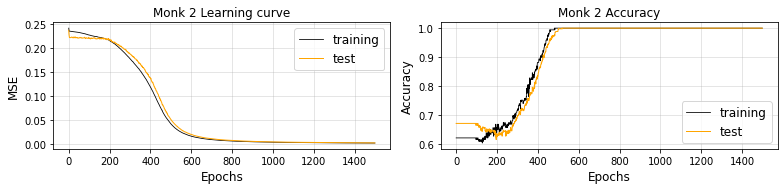

In [9]:
train_pred = netw.predict(input_data)
val_pred = netw.predict(val_data)
x = np.arange(len(netw.train_MEE))

h = 11
l = h*5/20
second_col = 'orange'#'orange'
monk_num = 2 # number of monk dataset


plt.figure(figsize=(h,l))
plt.subplot(121)
plt.plot(x,netw.train_MSE,label="training", lw = 0.8, c = 'black')
plt.plot(x,netw.val_MSE,label="test", lw = 1, c = second_col)
plt.title(f"Monk {monk_num} Learning curve")
plt.xlabel("Epochs",fontsize="large")
plt.ylabel("MSE",fontsize="large")
plt.grid(alpha = 0.4)
plt.legend(fontsize="large")

plt.subplot(122)
plt.plot(x,netw.train_accuracy,label="training", lw = 0.8, c = 'black')
plt.plot(x,netw.val_accuracy,label="test", lw = 1, c = second_col)
plt.title (f"Monk {monk_num} Accuracy")
plt.ylabel("Accuracy",fontsize="large")
plt.xlabel("Epochs",fontsize="large")
plt.legend(fontsize="large", loc = 'lower right')
plt.grid(alpha = 0.4)
plt.tight_layout()
if second_col == 'silver': name = f'monk{monk_num}_bg.png'
elif second_col == 'orange': name = f'monk{monk_num}_bo.png'
else: name = f'monk{monk_num}_unknow.png'
plt.savefig('../report/figures/MONK/' + name, dpi = 200)

In [41]:
accuracy_val=[]
accuracy_tr=[]
mse_tr=[]
mse_val=[]
for i in range(60):
        print("Try: ",i)
        netw = MLP(structure, func=act_func,
                starting_points=start)
        netw.train(input_data, labels, val_data, val_labels,
                epoch = N_epoch,eta = learning_rate, lamb = lamb,alpha=alpha,
                nesterov=nesterov,batch_size=batch_size,verbose=False)
        accuracy_val.append(netw.val_accuracy[-1])
        accuracy_tr.append(netw.train_accuracy[-1])
        mse_tr.append(netw.train_MSE[-1])
        mse_val.append(netw.val_MSE[-1])
        print("Accuracy: ",accuracy_val[-1])
        print("mean_std: ",np.mean(accuracy_val), " ", np.std(accuracy_val),"\n")
print(f"Accuracy_val: {np.mean(accuracy_val)} +- {np.std(accuracy_val)}\n Accuracy_tr: {np.mean(accuracy_tr)} +- {np.std(accuracy_tr)}\n MSE_tr: {np.mean(mse_tr)} +- {np.std(mse_tr)}\n MSE_val: {np.mean(mse_val)} +- {np.std(mse_val)}")

Try:  0
Epoch 1500:  [train MEE = 0.0382]  [val MEE = 0.0407]                              
Elapsed time: 1.6617114543914795 s
Accuracy:  1.0
mean_std:  1.0   0.0 

Try:  1
Epoch 1500:  [train MEE = 0.0336]  [val MEE = 0.0360]                              
Elapsed time: 1.6354382038116455 s
Accuracy:  1.0
mean_std:  1.0   0.0 

Try:  2
Epoch 1500:  [train MEE = 0.0369]  [val MEE = 0.0392]                              
Elapsed time: 1.6322882175445557 s
Accuracy:  1.0
mean_std:  1.0   0.0 

Try:  3
Epoch 1500:  [train MEE = 0.0344]  [val MEE = 0.0381]                              
Elapsed time: 1.6249091625213623 s
Accuracy:  1.0
mean_std:  1.0   0.0 

Try:  4
Epoch 1500:  [train MEE = 0.0330]  [val MEE = 0.0355]                              
Elapsed time: 1.6067471504211426 s
Accuracy:  1.0
mean_std:  1.0   0.0 

Try:  5
Epoch 1500:  [train MEE = 0.0314]  [val MEE = 0.0337]                              
Elapsed time: 1.6038284301757812 s
Accuracy:  1.0
mean_std:  1.0   0.0 

Try:  6
Ep